In [1]:
import xarray as xr

# Load the tutorial dataset
ds = xr.tutorial.load_dataset("air_temperature")

In [2]:
print(ds)

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...


In [3]:
print("\nCoordinates:")
print(list(ds.coords))       # names only
for name, da in ds.coords.items():
    print(f"  {name}: dims={da.dims}, dtype={da.dtype}, size={da.size}")


Coordinates:
['lat', 'lon', 'time']
  lat: dims=('lat',), dtype=float32, size=25
  lon: dims=('lon',), dtype=float32, size=53
  time: dims=('time',), dtype=datetime64[ns], size=2920


In [4]:
print("\nData variables:")
print(list(ds.data_vars))    # names only
for name, da in ds.data_vars.items():
    print(f"  {name}: dims={da.dims}, dtype={da.dtype}, attrs={list(da.attrs.keys())}")


Data variables:
['air']
  air: dims=('time', 'lat', 'lon'), dtype=float64, attrs=['long_name', 'units', 'precision', 'GRIB_id', 'GRIB_name', 'var_desc', 'dataset', 'level_desc', 'statistic', 'parent_stat', 'actual_range']


In [5]:
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [6]:
#TASK 2

point_air = ds["air"].sel(lat=50.0, lon=240.0)
print(point_air)

<xarray.DataArray 'air' (time: 2920)> Size: 23kB
array([265.5 , 264.  , 261.2 , ..., 257.99, 259.29, 256.79], shape=(2920,))
Coordinates:
    lat      float32 4B 50.0
    lon      float32 4B 240.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]


In [7]:
air_on_date = ds["air"].sel(time="2013-01-15")
print("Shape:", air_on_date.shape)

Shape: (4, 25, 53)


In [8]:
na_box = ds["air"].sel(
    lat=slice(25.0, 60.0),
    lon=slice(220.0, 300.0)
)

print(na_box)
print("Shape:", na_box.shape)

<xarray.DataArray 'air' (time: 2920, lat: 0, lon: 33)> Size: 0B
array([], shape=(2920, 0, 33), dtype=float64)
Coordinates:
  * lat      (lat) float32 0B 
  * lon      (lon) float32 132B 220.0 222.5 225.0 227.5 ... 295.0 297.5 300.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]
Shape: (2920, 0, 33)


In [9]:
ds.sel(time=slice("2013-06-01", "2013-06-10"))


<xarray.Dataset> Size: 425kB
Dimensions:  (time: 40, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 320B 2013-06-01 ... 2013-06-10T18:00:00
Data variables:
    air      (time, lat, lon) float64 424kB 273.1 273.2 273.1 ... 297.5 297.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [10]:
ds.sel(time="2013-06-01")

<xarray.Dataset> Size: 43kB
Dimensions:  (time: 4, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 32B 2013-06-01 ... 2013-06-01T18:00:00
Data variables:
    air      (time, lat, lon) float64 42kB 273.1 273.2 273.1 ... 297.5 297.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [11]:
ds.isel(time=4)

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-02
Data variables:
    air      (lat, lon) float64 11kB 243.2 243.1 243.1 ... 297.1 297.4 297.4
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [12]:
# Subset: time steps 0–9, lat indices 50–60, lon indices 100–120
ds.isel(time=slice(0, 10), lat=slice(50, 61), lon=slice(100, 121))

<xarray.Dataset> Size: 80B
Dimensions:  (time: 10, lat: 0, lon: 0)
Coordinates:
  * lat      (lat) float32 0B 
  * lon      (lon) float32 0B 
  * time     (time) datetime64[ns] 80B 2013-01-01 ... 2013-01-03T06:00:00
Data variables:
    air      (time, lat, lon) float64 0B 
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [13]:
# Subset: June 2013 to July 2013, lat 10°–20°, lon 70°–90°
ds.sel(
    time=slice("2013-06-01", "2013-07-31"),
    lat=slice(10, 20),
    lon=slice(70, 90)
)

<xarray.Dataset> Size: 2kB
Dimensions:  (time: 244, lat: 0, lon: 0)
Coordinates:
  * lat      (lat) float32 0B 
  * lon      (lon) float32 0B 
  * time     (time) datetime64[ns] 2kB 2013-06-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 0B 
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [14]:
#TASK 3

air_f = (ds["air"] - 273.15) * 9/5 + 32
print(air_f)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[-25.51 , -23.17 , -21.37 , ..., -40.63 , -35.77 , -30.19 ],
        [-20.83 , -19.57 , -19.21 , ..., -40.63 , -36.13 , -28.93 ],
        [ -9.67 , -10.03 , -11.668, ..., -39.91 , -34.168, -24.61 ],
        ...,
        [ 74.21 ,  73.49 ,  73.85 , ...,  72.05 ,  71.51 ,  70.79 ],
        [ 72.95 ,  73.49 ,  74.552, ...,  72.95 ,  72.95 ,  71.69 ],
        [ 73.652,  74.552,  75.11 , ...,  74.75 ,  74.552,  74.21 ]],

       [[-23.89 , -22.81 , -22.09 , ..., -42.07 , -39.19 , -35.23 ],
        [-21.19 , -20.29 , -20.11 , ..., -43.87 , -41.17 , -35.41 ],
        [ -3.91 ,  -4.468,  -5.89 , ..., -44.23 , -39.568, -30.37 ],
        ...,
        [ 73.85 ,  72.95 ,  73.49 , ...,  72.05 ,  71.51 ,  70.952],
        [ 73.49 ,  74.39 ,  74.552, ...,  72.41 ,  72.23 ,  71.51 ],
        [ 73.652,  75.29 ,  75.65 , ...,  73.85 ,  73.85 ,  74.21 ]],

       [[-23.53 , -23.71 , -23.53 , ..., -37.93 , -34.69 , -30.01 ],
      

In [15]:
air_mean = ds["air"].mean(dim="time")

print(air_mean)
print("Shape:", air_mean.shape)

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[260.37644178, 260.18305137, 259.88662671, ..., 250.81590068,
        251.93811644, 253.43804795],
       [262.73439384, 262.79397603, 262.74933904, ..., 249.75590411,
        251.58575685, 254.35926027],
       [264.7687637 , 264.32730822, 264.06169521, ..., 250.60789041,
        253.58351027, 257.71559932],
       ...,
       [297.64986301, 296.95333219, 296.62931507, ..., 296.81092466,
        296.28796233, 295.81645548],
       [298.12920205, 297.93700685, 297.47039384, ..., 296.85954795,
        296.7770274 , 296.44383562],
       [298.36615068, 298.38573973, 298.11414384, ..., 297.33820548,
        297.28144521, 297.30510274]], shape=(25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Shape: (25, 53)


In [16]:
air_anomaly = ds["air"] - air_mean
print(air_anomaly)
print("Shape:", air_anomaly.shape)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[-1.91764418e+01, -1.76830514e+01, -1.63866267e+01, ...,
         -1.80159007e+01, -1.64381164e+01, -1.48380479e+01],
        [-1.89343938e+01, -1.82939760e+01, -1.80493390e+01, ...,
         -1.69559041e+01, -1.62857568e+01, -1.50592603e+01],
        [-1.47687637e+01, -1.45273082e+01, -1.51716952e+01, ...,
         -1.74078904e+01, -1.71935103e+01, -1.60155993e+01],
        ...,
        [-1.04986301e+00, -7.53332192e-01, -2.29315068e-01, ...,
         -1.41092466e+00, -1.18796233e+00, -1.11645548e+00],
        [-2.22920205e+00, -1.73700685e+00, -6.80393836e-01, ...,
         -9.59547945e-01, -8.77027397e-01, -1.24383562e+00],
        [-2.07615068e+00, -1.59573973e+00, -1.01414384e+00, ...,
         -4.38205479e-01, -4.91445205e-01, -7.05102740e-01]],

       [[-1.82764418e+01, -1.74830514e+01, -1.67866267e+01, ...,
         -1.88159007e+01, -1.83381164e+01, -1.76380479e+01],
        [-1.91343938e+01, -1.8693976

In [17]:
# TASK 4

global_mean_ts = ds["air"].mean(dim=["lat", "lon"])

print(global_mean_ts)
print("Shape:", global_mean_ts.shape)

<xarray.DataArray 'air' (time: 2920)> Size: 23kB
array([274.1662717 , 273.52021887, 273.23350943, ..., 272.99996226,
       273.04449057, 273.41498113], shape=(2920,))
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Shape: (2920,)


In [18]:
air_cell_mean = ds["air"].mean(dim="time")
air_cell_mean.name = "air_mean_over_time"
air_cell_mean.attrs.update({"long_name": "Mean air temperature over time", "units": "K"})

print(air_cell_mean)
print("Shape:", air_cell_mean.shape)

<xarray.DataArray 'air_mean_over_time' (lat: 25, lon: 53)> Size: 11kB
array([[260.37644178, 260.18305137, 259.88662671, ..., 250.81590068,
        251.93811644, 253.43804795],
       [262.73439384, 262.79397603, 262.74933904, ..., 249.75590411,
        251.58575685, 254.35926027],
       [264.7687637 , 264.32730822, 264.06169521, ..., 250.60789041,
        253.58351027, 257.71559932],
       ...,
       [297.64986301, 296.95333219, 296.62931507, ..., 296.81092466,
        296.28796233, 295.81645548],
       [298.12920205, 297.93700685, 297.47039384, ..., 296.85954795,
        296.7770274 , 296.44383562],
       [298.36615068, 298.38573973, 298.11414384, ..., 297.33820548,
        297.28144521, 297.30510274]], shape=(25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:  Mean air temperature over time
    units:      K
Shape: (25, 53)


In [19]:
max_temp2 = ds["air"].sortby("lat").sel(lat=slice(30, 50), lon=slice(235, 245)).max(skipna=True)
print("Max (K) via .sel:", max_temp2.item())


Max (K) via .sel: 314.7


In [20]:
#TASK 5

monthly_mean = ds["air"].groupby("time.month").mean(dim="time")

print(monthly_mean)
print("Shape:", monthly_mean.shape)

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)> Size: 127kB
array([[[246.34975806, 246.38592742, 246.21495968, ..., 243.06096774,
         244.08774194, 245.64653226],
        [248.8575    , 248.90729839, 248.71028226, ..., 241.52846774,
         243.50846774, 246.75451613],
        [251.5771371 , 251.19649194, 250.71451613, ..., 243.39870968,
         246.78439516, 251.56556452],
        ...,
        [295.85040323, 295.24423387, 295.22709677, ..., 295.18641129,
         294.65725806, 294.04866935],
        [296.54467742, 296.47      , 296.16024194, ..., 295.35612903,
         295.08141129, 294.53016129],
        [297.15447581, 297.23842742, 297.04915323, ..., 296.01814516,
         295.77580645, 295.63677419]],

       [[246.67709821, 246.405625  , 245.94830357, ..., 241.85825893,
         243.001875  , 244.44366071],
        [247.79995536, 247.75986607, 247.47741071, ..., 240.646875  ,
         242.26611607, 245.06642857],
        [249.07075893, 248.57227679, 247.94245536, ...

In [21]:
daily_mean = ds["air"].groupby("time.dayofyear").mean(dim="time")

print(daily_mean)
print("Shape:", daily_mean.shape)

<xarray.DataArray 'air' (dayofyear: 365, lat: 25, lon: 53)> Size: 4MB
array([[[247.235  , 246.77375, 246.2725 , ..., 237.51125, 238.98625,
         241.01125],
        [249.18625, 249.22375, 248.9975 , ..., 234.93375, 236.74875,
         240.1625 ],
        [251.625  , 251.61125, 251.4475 , ..., 236.4375 , 239.1975 ,
         244.02125],
        ...,
        [296.4625 , 296.02375, 296.03625, ..., 295.83625, 295.36   ,
         295.08375],
        [296.89875, 296.9875 , 296.72   , ..., 296.01125, 295.8125 ,
         295.36   ],
        [297.17   , 297.3475 , 297.23625, ..., 296.54875, 296.30875,
         296.04875]],

       [[247.08375, 246.525  , 245.87375, ..., 241.76125, 243.1225 ,
         244.7475 ],
        [251.3725 , 250.85   , 250.04875, ..., 239.06125, 240.345  ,
         242.7375 ],
        [253.91   , 253.31125, 252.49875, ..., 238.66125, 241.17125,
         245.13625],
...
        [296.34375, 295.65625, 295.655  , ..., 296.64375, 295.9225 ,
         294.935  ],
        [29

Using time: 2014-07-15T00:00:00.000000000


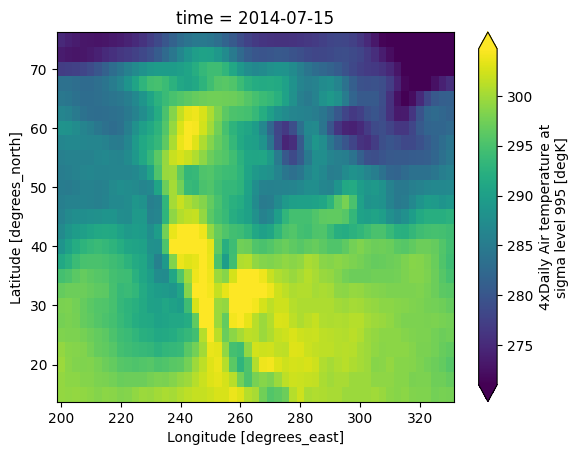

In [22]:
#TASK 6
da = ds["air"].sel(time="2014-07-15", method="nearest")
print("Using time:", str(da["time"].values))
da.plot(robust=True)

In [23]:
point_ts = ds["air"].sel(lat=40.0, lon=260.0, method="nearest")
plt.figure(figsize=(10,4))
point_ts.plot(marker="o", markersize=2, linewidth=1, color="tab:red")
plt.title("Air Temperature at (lat=40.0, lon=260.0)")
plt.ylabel("Temperature (K)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined